In [4]:
import dynamiqs
print(dir(dynamiqs))

['DenseQArray', 'FloquetResult', 'MEPropagatorResult', 'MESolveResult', 'Options', 'QArray', 'QArrayLike', 'SEPropagatorResult', 'SESolveResult', 'SparseDIAQArray', 'TimeQArray', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_checks', '_utils', 'asqarray', 'basis', 'basis_dm', 'bloch_coordinates', 'braket', 'cd_gate', 'cnot', 'coherent', 'coherent_dm', 'constant', 'cosm', 'create', 'dag', 'dark', 'dense', 'dense_qarray', 'destroy', 'dia', 'displace', 'dissipator', 'entropy_vn', 'excited', 'expect', 'expm', 'eye', 'eye_like', 'fidelity', 'floquet', 'fock', 'fock_dm', 'general', 'global_settings', 'gradient', 'ground', 'hadamard', 'hc', 'hermitian_conjugate', 'integrators', 'isbra', 'isdm', 'isherm', 'isket', 'isop', 'isqarraylike', 'layout', 'lindbladian', 'mepropagator', 'mesolve', 'modulated', 'momentum', 'norm', 'number', 'operator_to_vector', 'operators', 'optimal_control', 'options', 'overlap', 

|██████████| 100.0% ◆ elapsed 47.08ms ◆ remaining 0.00ms
100%|██████████| 50/50 [00:04<00:00, 12.27it/s]


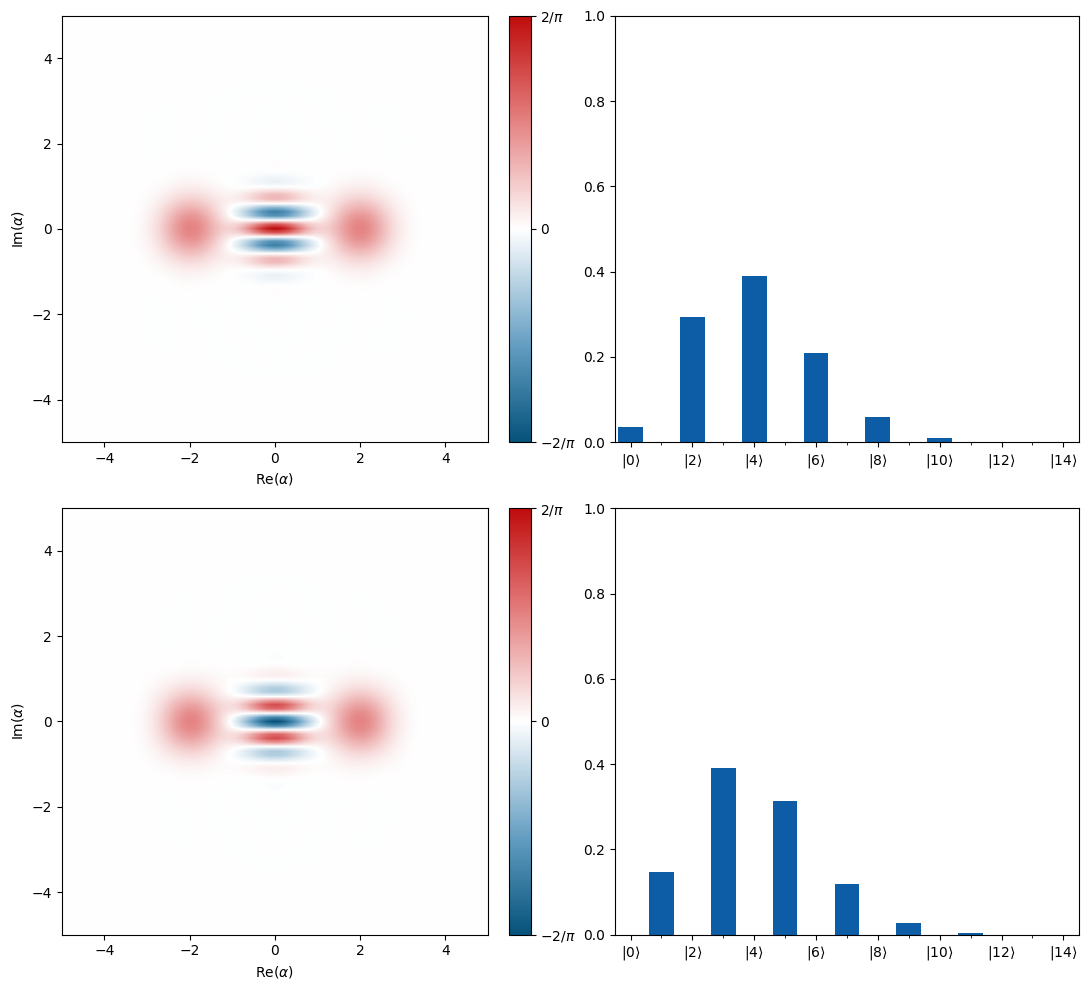

In [1]:
import dynamiqs as dq
import jax as jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import dynamiqs as dq  # assuming dynamiqs is imported as dq

# --- Parameters and initial setup ---
alpha = 2.0             # Cat size
na = 15                 # Hilbert space dimension
a = dq.destroy(na)      # Annihilation operator
psi0 = dq.fock(na, 0)   # Initial state (vacuum)
H = dq.zeros(na)        # Zero Hamiltonian (no unitary evolution)
kappa_2 = 1             # 2 photon loss rate

# Create even and odd cat states (for later mosaic plots)
cat_even = dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha))
cat_odd  = dq.unit(dq.coherent(na, alpha) - dq.coherent(na, -alpha))

# --- Time evolution setup ---
t_save = np.linspace(0, 3, 100)
# Define the two-photon loss operator (using matrix multiplication '@')
loss_op = np.sqrt(kappa_2) * (a @ a - alpha**2 * dq.eye(na))
res = dq.mesolve(H, [loss_op], psi0, t_save)

# --- Create and save the Wigner function animation as a GIF ---
# Generate the animation without xlim and ylim arguments.
wigner_anim = dq.plot.wigner_gif(res.states)
# Save the animation as a GIF file (using the pillow writer and desired fps)
# wigner_anim.save('wigner_animation.gif', writer='pillow', fps=10)

# --- Optional: Create the mosaic plots for the cat states ---
fig, ax = plt.subplots(2, 2, figsize=(11, 10))
dq.plot.wigner(cat_even, ax=ax[0, 0])  # Wigner of even cat state
dq.plot.fock(cat_even, ax=ax[0, 1])    # Fock representation of even cat state
dq.plot.wigner(cat_odd, ax=ax[1, 0])     # Wigner of odd cat state
dq.plot.fock(cat_odd, ax=ax[1, 1])       # Fock representation of odd cat state
plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import dynamiqs as dq  # Replace or adjust according to your quantum module (e.g., qutip)
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

# 1. Run the Simulation
alpha = 2.0             # Cat size
na = 15                 # Hilbert space dimension
a = dq.destroy(na)      # Annihilation operator
psi0 = dq.fock(na, 0)   # Initial state
H = dq.zeros(na)        # Zero Hamiltonian
kappa_2 = 1             # 2 photon loss rate

# Time array for simulation
t_save = np.linspace(0, 4, 100)

# Define the loss operator
loss_op = np.sqrt(kappa_2) * (a @ a - alpha**2 * dq.eye(na))

# Run the simulation
res = dq.mesolve(H, [loss_op], psi0, t_save)

# 2. Set Up the Figure
fig, ax = plt.subplots(2, 2, figsize=(11, 10))

# 3. Define the Update Function
# ---------------------------
def update(frame):
    # Clear all subplots
    for a_axis in ax.flatten():
        a_axis.cla()
    
    # Get the quantum state for the current frame
    current_state = res.states[frame]
    
    # Plot Wigner and Fock representations
    dq.plot.wigner(current_state, ax=ax[0, 0])
    dq.plot.fock(current_state, ax=ax[0, 1])
    
    # For demonstration, re-use the same state on the bottom row.
    dq.plot.wigner(current_state, ax=ax[1, 0])
    dq.plot.fock(current_state, ax=ax[1, 1])
    
    # Update the title with the current time
    fig.suptitle(f'Time = {t_save[frame]:.2f}', fontsize=16)

# 4. Create the Animation
ani = animation.FuncAnimation(fig, update, frames=len(t_save), repeat=False)

# 5. Save the Animation as a GIF
filename = 'quantum_animation.gif'
ani.save(filename, writer=PillowWriter(fps=20))

# 6. (Optional) Display the GIF in Jupyter Notebook
plt.close(fig)
HTML(f'<img src="{filename}">')


|██████████| 100.0% ◆ elapsed 56.00ms ◆ remaining 0.00ms


|██████████| 100.0% ◆ elapsed 515.67ms ◆ remaining 0.00ms  


/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


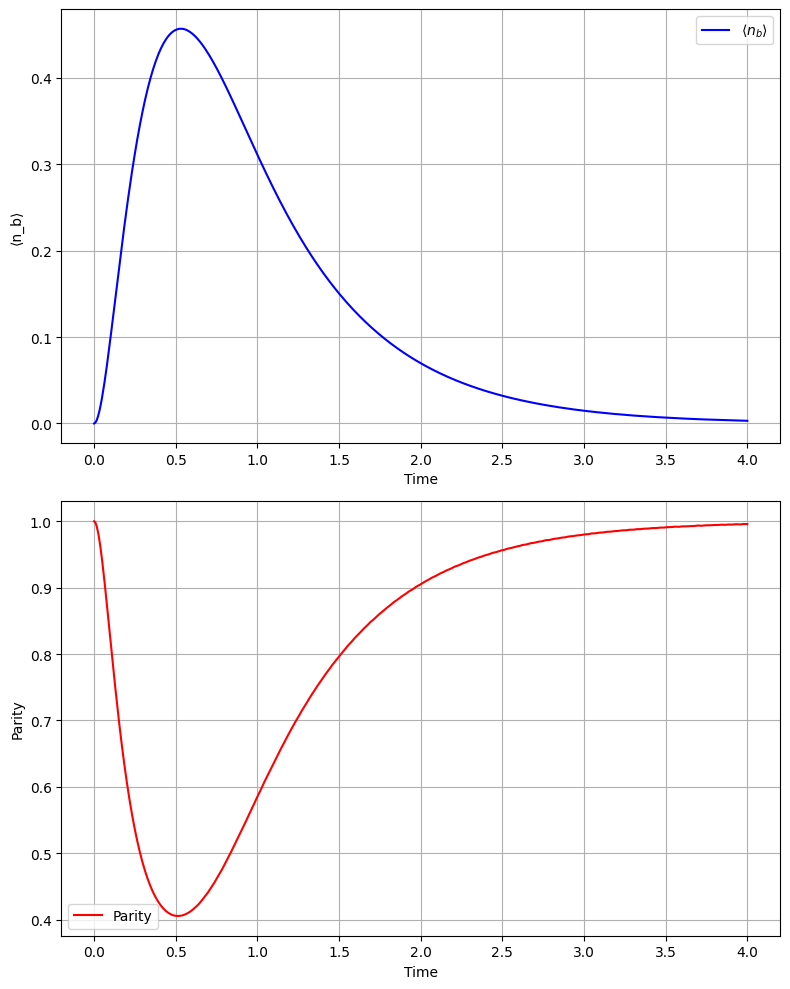

In [6]:
import dynamiqs as dq
import jax.numpy as jnp       
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML, display
from functools import reduce     # Import reduce to sum qarrays without starting with 0

# Hilbert-space truncations
na = 20   # Buffer mode a 
nb = 5    # Memory mode b

# Operators in the composite Hilbert space
a = dq.tensor(dq.destroy(na), dq.eye(nb))     # Mode a annihilation operator
adag = a.dag()                                # Mode a creation operator
b = dq.tensor(dq.eye(na), dq.destroy(nb))     # Mode b annihilation operator
bdag = b.dag()                                # Mode b creation operator

# Other parameters
g_2 = 1.0
eps_d = -4.0
kappa_b = 10

# Hamiltonian construction
H_2ph = g_2 * (adag @ adag @ b) + jnp.conjugate(g_2) * (a @ a @ bdag)
H_d = jnp.conjugate(eps_d) * b + eps_d * bdag
H = H_2ph + H_d

# Initalizes both modees in the vacuum state
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))

# Creates time array
T = 4
t_save = jnp.linspace(0, T, 500) 

# Collapse operator on b
c_ops = [jnp.sqrt(kappa_b) * b]

# Solves the Linblad master equation
res = dq.mesolve(H, c_ops, psi0, t_save)

# Expectation value of n_b
n_b = bdag @ b

# Build the parity operator for mode b.
# Instead of using a diagonal function, sum over the Fock state projectors weighted by (-1)^n.
# It is assumed that dq.fock_dm(nb, n) creates the projector |n><n| for mode b.
terms = [ (-1)**n * dq.fock_dm(nb, n) for n in range(nb) ]
parity_b_local = reduce(lambda a, b: a + b, terms)
# Now, tensor with the identity for mode a.
parity_b = dq.tensor(dq.eye(na), parity_b_local)

# Compute expectation values for each time step.
n_b_expect = [dq.expect(n_b, state) for state in res.states]
parity_b_expect = [dq.expect(parity_b, state) for state in res.states]

# ---------------------------
# 6. Animate the Wigner function of mode a
# ---------------------------
fig_w, ax_w = plt.subplots(1, 1, figsize=(6, 6))

def update(frame):
    ax_w.cla()  # Clear the axis.
    # Obtain the reduced state of mode a by tracing out mode b.
    rho_a = dq.ptrace(res.states[frame], 0)
    dq.plot.wigner(rho_a, ax=ax_w)
    ax_w.set_title(f"Mode a Wigner Function\nTime = {t_save[frame]:.2f}")

ani = animation.FuncAnimation(fig_w, update, frames=len(t_save), repeat=False)
gif_filename = 'wigner_mode_a.gif'
ani.save(gif_filename, writer=PillowWriter(fps=25))
plt.close(fig_w)
display(HTML(f'<img src="{gif_filename}">'))

# ---------------------------
# 7. Plot the expectation value and parity for mode b
# ---------------------------
fig2, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plot the expectation value of the photon number in mode b.
ax1.plot(t_save, n_b_expect, label=r'$\langle n_b \rangle$', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('⟨n_b⟩')
ax1.legend()
ax1.grid(True)

# Plot the photon number parity in mode b.
ax2.plot(t_save, parity_b_expect, label='Parity', color='red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Parity')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

|██████████| 100.0% ◆ elapsed 86.63ms ◆ remaining 0.00ms


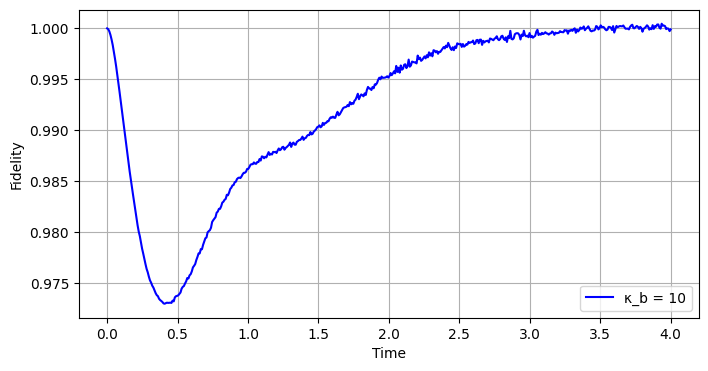

In [19]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Parameters from Task 1.1
g2 = 1.0
eps_d = -4.0
kappa_b = 10  # Original value (vary this later)
na = 20       # Truncation for mode a

# Compute effective parameters for adiabatic elimination
kappa_2 = 4 * abs(g2)**2 / kappa_b
alpha_sq = -eps_d / jnp.conj(g2)  # α² = 4 → α = 2
alpha = jnp.sqrt(alpha_sq)

# Single-mode collapse operator (effective model)
a = dq.destroy(na)
L_eff = jnp.sqrt(kappa_2) * (a @ a - alpha_sq * dq.eye(na))

# Initial state (vacuum for mode a)
psi0_eff = dq.fock(na, 0)

# Solve the effective single-mode master equation
res_eff = dq.mesolve(dq.zeros(na), [L_eff], psi0_eff, t_save)

# Extract states from both models
rho_a_list_task11 = [dq.ptrace(state, 0) for state in res.states]  # From Task 1.1
rho_a_list_eff = res_eff.states                                   # Effective model

# Compute fidelity over time
fidelity = [dq.fidelity(rho_a, rho_eff) for rho_a, rho_eff in zip(rho_a_list_task11, rho_a_list_eff)]

# Plot fidelity
plt.figure(figsize=(8, 4))
plt.plot(t_save, fidelity, label=f'κ_b = {kappa_b}', color='blue')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.legend()
plt.grid(True)
plt.show()

|██████████| 100.0% ◆ elapsed 166.90ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 561.84ms ◆ remaining 0.00ms  


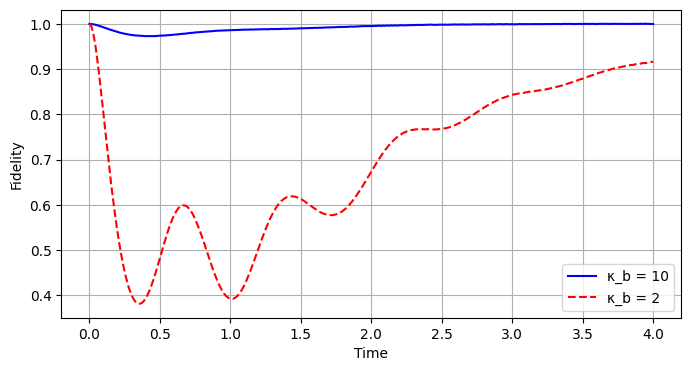

In [20]:
# New κ_b (weaker dissipation → adiabatic elimination less valid)
kappa_b_new = 2

# Recompute κ₂ for the new κ_b
kappa_2_new = 4 * abs(g2)**2 / kappa_b_new  # κ₂ = 2.0

# Simulate effective model with new κ₂
L_eff_new = jnp.sqrt(kappa_2_new) * (a @ a - alpha_sq * dq.eye(na))
res_eff_new = dq.mesolve(dq.zeros(na), [L_eff_new], psi0_eff, t_save)

# Re-run Task 1.1 with new κ_b (update collapse operator)
c_ops_new = [jnp.sqrt(kappa_b_new) * b]  # Update κ_b in original code
res_new = dq.mesolve(H, c_ops_new, psi0, t_save)

# Compute fidelity for new κ_b
rho_a_list_task11_new = [dq.ptrace(state, 0) for state in res_new.states]
fidelity_new = [dq.fidelity(rho_a, rho_eff_new) 
                for rho_a, rho_eff_new in zip(rho_a_list_task11_new, res_eff_new.states)]

# Plot both fidelities
plt.figure(figsize=(8, 4))
plt.plot(t_save, fidelity, label=f'κ_b = 10', color='blue')
plt.plot(t_save, fidelity_new, label=f'κ_b = 2', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.legend()
plt.grid(True)
plt.show()